# CS3630 Project 2: Vacuum Cleaning Robot (Fall 2022)
## Brief
- Due: Tue, Sep 27 at 11:59pm on gradescope
- Late due date: Fri, Sep 30 at 11:59 PM
- Hand-in: through Gradescope

## Getting started
In order to use a file as your own, once we give you the colab notebook link:
1. Click the “File” button on the toolbar at the top
2. Click “Save a Copy”
3. Work on the project within the copy (it will say “Copy of…”)
4. In addition to coding, you will have to write a powerpoint report containing answers the questions found in this notebook. You must use [this powerpoint template](https://docs.google.com/presentation/d/14tBbwdc-_cdgZ8AyFubDpVGnt1p1gRA9/edit?usp=sharing&ouid=105677693728799820457&rtpof=true&sd=true) for your report.

## Submission Instructions
In order to submit a file, once you complete the project:
1. Click the “File” button on the toolbar at the top
2. Click “Download”
3. And then click “Download .ipynb”
4. You will now have the .ipynb file on your local machine.
5. Make sure it is named `project2.ipynb`
6. Submit the `project2.ipynb` file to gradescope

Also submit your Project 2 Report as a pdf in gradescope.
* You can download the report powerpoint [here](https://docs.google.com/presentation/d/14tBbwdc-_cdgZ8AyFubDpVGnt1p1gRA9/edit?usp=sharing&ouid=105677693728799820457&rtpof=true&sd=true).

## Introduction
Welcome to your second project in CS3630 (Fall 2022)!

In this project, we will be building a vacuum cleaning robot as illustrated in the [textbook](http://www.roboticsbook.org/intro.html). We want the robot to infer where it is in the world given sensor values and observations using Markov Decision Processes. Please refer to [Chapter 3](http://www.roboticsbook.org/S30_vacuum_intro.html) of the book for a more detailed description of the scenario. **This project is basically based on Chapter 3 of the textbook. Please use the same numbers and data in the textbook for each TODO.**

**RERUN THE SETUP CODE EVERYTIME YOU START**
---
DON'T CHANGE THE SETUP CODE! PLEASE START TO WORK FROM SECTION 3.1

---



In [ ]:
#Need to run this everytime the notebook gets disconnected
%pip install -q -U gtbook

     |████████████████████████████████| 21.2 MB 78.4 MB/s 


Run this code block to import the necessary packages.

In [ ]:
import numpy as np
import gtsam
import pandas as pd
import time
import gtbook
from gtbook.display import show
from gtbook.discrete import Variables
VARIABLES = Variables()
def pretty(obj): 
    return gtbook.display.pretty(obj, VARIABLES)
def show(obj, **kwargs): 
    return gtbook.display.show(obj, VARIABLES, **kwargs)

import plotly.express as px
try:
    import google.colab
except:
    import plotly.io as pio
    pio.renderers.default = "png"
from enum import Enum

Run this code block to setup the discrete state, action, and observation spaces.

In [ ]:
# Constants. DON'T CHANGE THE VARIABLE NAMES AND VALUES
ACTIONS = ["L","R","U","D",]
ROOMS = ["Living Room", "Kitchen", "Office", "Hallway", "Dining Room"]
LIGHT_LEVELS = ["dark", "medium", "light"]

Here is a rough map of the house the robot is operating in:

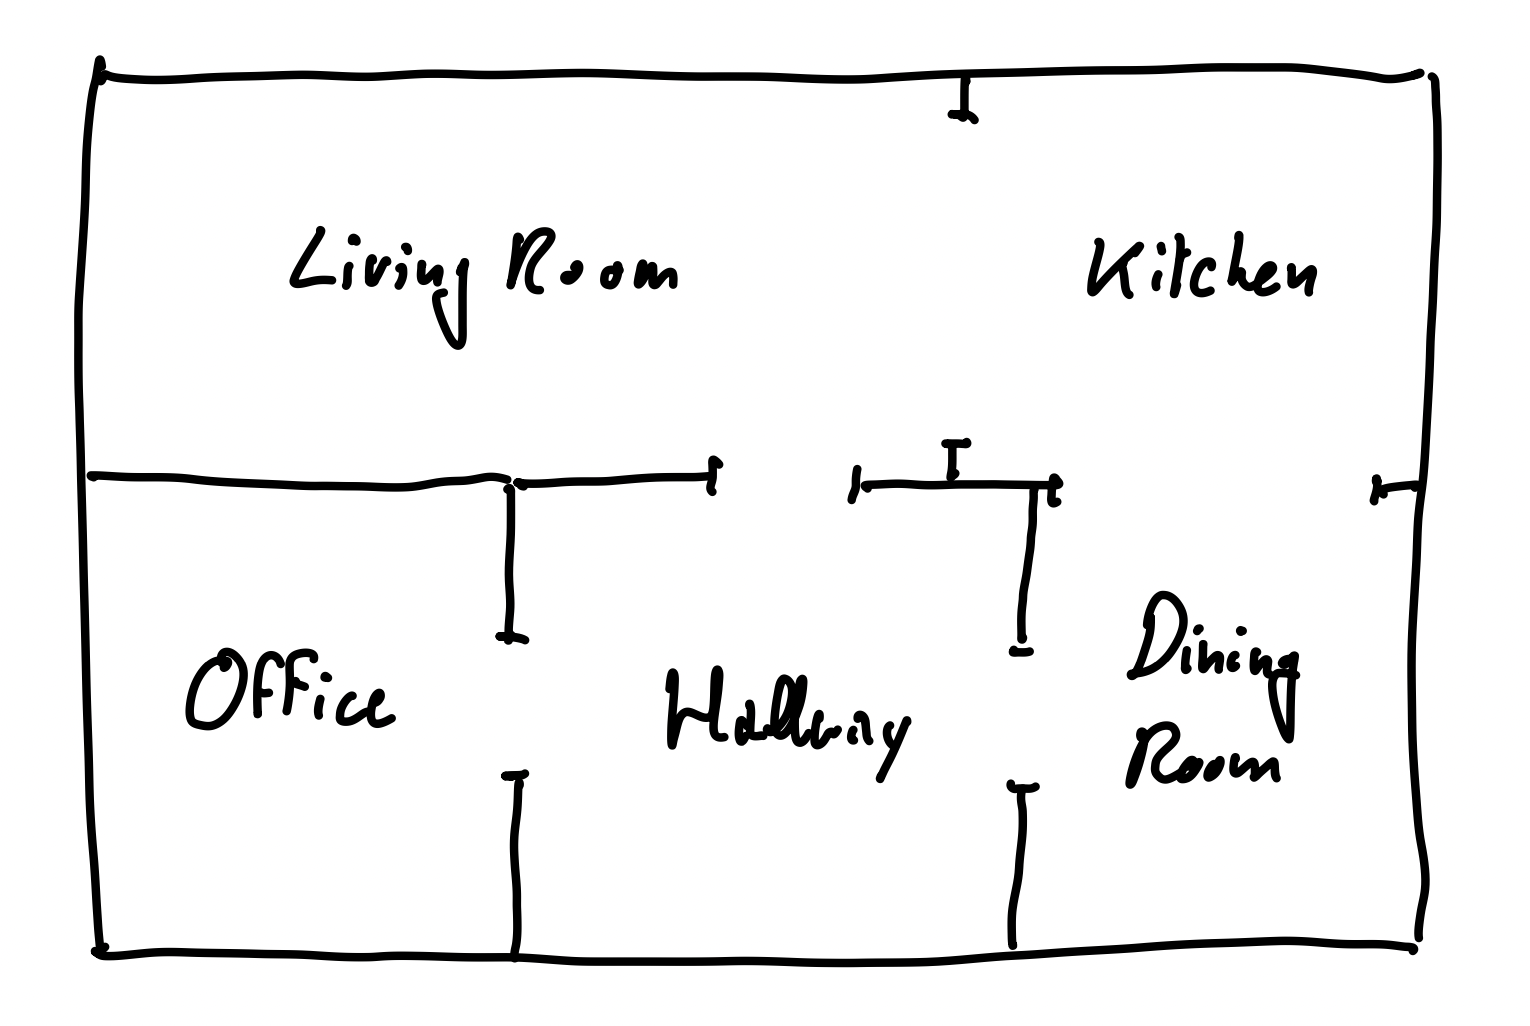

##**Section 3.1: Modeling the State Space**
In this project, we are building a *smart* home vacuum cleaning robot: RoomBuzz! Our robot will be able to infer our current state based on its actions and observations. Our robot operates under a discrete time series, so at each timestep we can figure out where the robot is in the world. To do this, we must first model our state and action space. This can be done easily with GTSAM Variables!

In order to understand the API of Variables, run the following cell. We want to create a **discrete time series** to represent the robot's states and actions at each discrete timestep. This is a dictionary mapping timestep values to states/actions taken in the respective timestep.

In [ ]:
# help(VARIABLES)

Now, let's define methods to create the RoomBuzz's states and actions at every timestep. You can find the ACTION and STATE constants at the top of the notebook.

Create a discrete series of actions with indices as keys and actions as values.

In [ ]:
# TODO 1
def create_action_series(action_variable_char, indices):
  """
  Returns a discrete series of actions

      Parameters:
          character (str): a single character assigned to the action state variable
          indices (list of ints): a list of integer indices 

      Returns:
          A (dict): a dictionary with the keys being integer indices and the values
                    being gtsam.DiscreteKeys
  """
  A = None
  ###############################################################################
  #                             START OF YOUR CODE                              #
  ###############################################################################
  A = VARIABLES.discrete_series(action_variable_char, indices, ACTIONS) #actions for times 1,2,3,4
  print("action series:", A)
  ###############################################################################
  #                              END OF YOUR CODE                               #
  ###############################################################################
  return A
# create_action_series('A',[1,2,3,4])

Create a discrete series of states with indices as keys and rooms as values.

In [ ]:
# TODO 2 
def create_state_series(state_variable_char, indices):
  """
  Returns a discrete series of rooms

      Parameters:
          character (str): a single character assigned to the room state variable
          indices (list of ints): a list of integer indices 

      Returns:
          X (dict): a dictionary with the keys being integer indices and the values
                    being gtsam.DiscreteKeys
  """
  X = None
  ###############################################################################
  #                             START OF YOUR CODE                              #
  ############################################################################### 
  X= VARIABLES.discrete_series(state_variable_char, indices, ROOMS) ## states for times 1,2,3,4,5

  print("state series: ",X)
  ###############################################################################
  #                              END OF YOUR CODE                               #
  ###############################################################################
  return X


Let's see if your code properly creates the state and action series:

In [ ]:
A = create_action_series("A", [1,2,3,4])
print("Action series:",A)

X = create_state_series("X", [1,2,3,4,5])
print("State series:", X)

action series: {1: (4683743612465315841, 4), 2: (4683743612465315842, 4), 3: (4683743612465315843, 4), 4: (4683743612465315844, 4)}
Action series: {1: (4683743612465315841, 4), 2: (4683743612465315842, 4), 3: (4683743612465315843, 4), 4: (4683743612465315844, 4)}
state series:  {1: (6341068275337658369, 5), 2: (6341068275337658370, 5), 3: (6341068275337658371, 5), 4: (6341068275337658372, 5), 5: (6341068275337658373, 5)}
State series: {1: (6341068275337658369, 5), 2: (6341068275337658370, 5), 3: (6341068275337658371, 5), 4: (6341068275337658372, 5), 5: (6341068275337658373, 5)}


Don't worry if you see large integer key values; the DiscreteKeys are instances of gtsam.Symbol, storing the character and the timestep value.

### REPORT QUESTIONS
##### 1.1) Identify whether the following situations follow a Bayesian or Frequentist approach. Give a short explanation why.

*   Find whether a coin is biased or not
*   Find the probability of getting an A in CS 3630
*   Find how long it will take for RoomBuzz to run out of charge

##### 1.2) Suppose RoomBuzz needs to charge every night, but the charger is located in the Office. RoomBuzz's robust software will consistently route it to the charger at the end of the day. What is the prior probability distribution of the robot's state every morning?

##**Section 3.2: Probabilistic Outcomes**

Unfortunately, RoomBuzz cannot identify the room it is in definitively. Therefore, the outcome of its actions are probabilistic; there are transition probabilities for the robot to move between rooms. To model this uncertainty, we can create a **motion model** for the robot, defining the conditional probability of the robot reaching a certain state in the next timestep given the current state and action taken:

$P(X_{t + 1}|X_t, A_t)$

To find the next state, given priors $b_s$ and motion model $M_a$, we can do the following matrix multiplication:

$b_{s'}=M_ab_s$

Here is the state transition diagram for RoomBuzz:

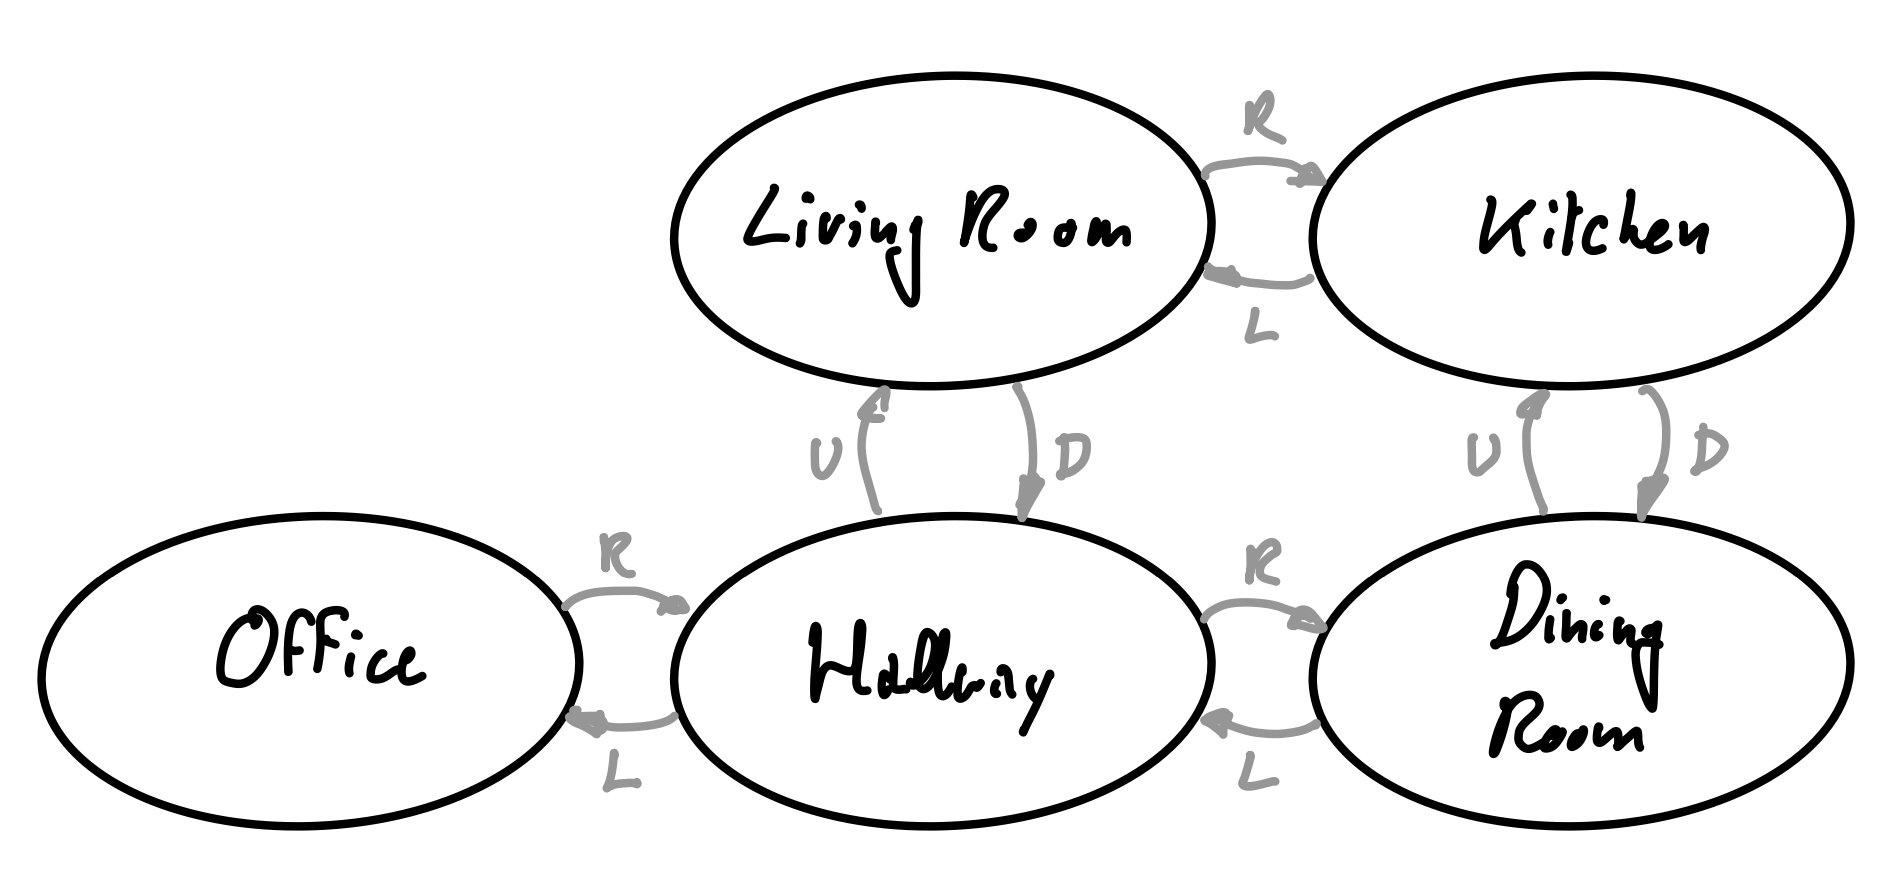

Create a motion model for RoomBuzz, which is a conditional probability table (CPT) mapping states and actions to future states. 

In [ ]:
# TODO 3
def create_motion_model(states, actions, action_spec):
  """
  Returns a motion model that describes state transitions P(X2|X1, A1)

      Parameters:
          states (dict): a discrete series of states (rooms)
          actions (dict): a discrete series of actions
          spec (str): a table that contains all possible values for P(X2|X1, A1)

      Returns:
          motion_model (gtsam.DiscreteConditional): a DiscreteConditional that 
          describes the state transition model P(X2|X1, A1)
  """
  motion_model = None
  ###############################################################################
  #                             START OF YOUR CODE                              #
  ############################################################################### 
  motion_model = gtsam.DiscreteConditional(states[2], [states[1], actions[1]],  action_spec)
  ###############################################################################
  #                              END OF YOUR CODE                               #
  ###############################################################################
  return motion_model


Run the following code block to define our CPT and motion model.

In [ ]:
prob_spec = """
    1/0/0/0/0 2/8/0/0/0 1/0/0/0/0 2/0/0/8/0
    8/2/0/0/0 0/1/0/0/0 0/1/0/0/0 2/0/0/0/8
    0/0/1/0/0 0/0/2/8/0 0/0/1/0/0 0/0/1/0/0
    0/0/8/2/0 0/0/0/2/8 8/0/0/2/0 0/0/0/1/0
    0/0/0/8/2 0/0/0/0/1 0/8/0/0/2 0/0/0/0/1
    """
  
model = create_motion_model(X,A,prob_spec)
pretty(model)

Using this motion model, we can create a Discrete Bayes Net which provides a graphical interpretation of our state transition.

In [ ]:
# TODO 4
def create_bayes_net(motion_model):
  """
  Returns a discrete bayes net of the motion model P(X2|X1, A1)

      Parameters:
          motion_model (gtsam.DiscreteConditional): a DiscreteConditional that describes the state transition model P(X2|X1, A1)

      Returns:
          bayes_net (gtsam.DiscreteBayesNet): a DiscreteBayesnet that describes the motion model
  """
  bayes_net = None
  ###############################################################################
  #                             START OF YOUR CODE                              #
  ############################################################################### 
  bayes_net = gtsam.DiscreteBayesNet()
  bayes_net.add(motion_model)
  ###############################################################################
  #                              END OF YOUR CODE                               #
  ###############################################################################
  return bayes_net
# bayes_net = create_bayes_net(model)
# show(bayes_net)

Run the following code block to visualize your bayes net.

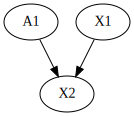

In [ ]:
bayes_net = create_bayes_net(model)
show(bayes_net)
# pretty(bayes_net)

###REPORT QUESTIONS
2.1) It's the beginning of the day, and RoomBuzz undocks from its charger in the Office. It chooses action "R" in order to clean the hallway. What is the probability that RoomBuzz does not end up in the hallway?

2.2) It's dinnertime and RoomBuzz has an 80/20 chance of being in the Dining Room or Kitchen, respectively. It takes action "L". What is the PMF over RoomBuzz's resulting belief state?

##**Section 3.3: Dynamic Bayes Nets**

Note that RoomBuzz's environment consists only of five states; thus it's not unreasonable to assume that it may return to a previous state. We can address this by unravelling time to remove cycles in our Bayes Net.

To improve RoomBuzz's accuracy, the team has decided to add a light sensor to the machine! This introduces the concept of observations in our DBN as well, which result from the current state. First, let's create a discrete series for the sensor measurements, with indices (discrete timesteps) as keys mapping to sensor measurements:

In [ ]:
# TODO 5
def create_sensor_series(sensor_variable_char, indices):
  """
  Returns a discrete series of light levels

      Parameters:
          sensor_variable_char (str): a single character assigned to the light levels state variable
          indices (list of ints): a list of integer indices 

      Returns:
          Z (dict): a dictionary with the keys being integer indices and the values
                    being gtsam.DiscreteKeys
  """
  Z = None
  ###############################################################################
  #                             START OF YOUR CODE                              #
  ############################################################################### 

  Z= VARIABLES.discrete_series(sensor_variable_char, indices,LIGHT_LEVELS) ## sensor for times 1,2,3,4,5

  ###############################################################################
  #                              END OF YOUR CODE                               #
  ###############################################################################
  return Z

Let's create the sensor series with five timesteps.

In [ ]:
Z = create_sensor_series("Z", [1,2,3,4,5])
print("Measurement series:", Z)

Measurement series: {1: (6485183463413514241, 3), 2: (6485183463413514242, 3), 3: (6485183463413514243, 3), 4: (6485183463413514244, 3), 5: (6485183463413514245, 3)}


Let's also create some priors. Define one prior that has a uniform distribution over all rooms, and another that reflects RoomBuzz always starting in the kitchen.

In [ ]:
#TODO 6
def get_prior():
  """
  Returns the priors to have uniform distribution over all the rooms.

  """
  prior = ""
  ###############################################################################
  #                             START OF YOUR CODE                              #
  ############################################################################### 
  # prior =gtsam.DiscreteDistribution(X[1], "1/1/1/1/1")
  prior = "1/1/1/1/1"
  ###############################################################################
  #                              END OF YOUR CODE                               #
  ###############################################################################
  return prior
print(get_prior())
#TODO 7
def get_kitchen_start_prior():
  """
  Change kitchen_start_prior such that it reflects the knowledge that the robot always starts at the kitchen

  """
  kitchen_start_prior = ""
  ###############################################################################
  #                             START OF YOUR CODE                              #
  ############################################################################### 
  # kitchen_start_prior =gtsam.DiscreteDistribution(X[1], "0/1/0/0/0")
  kitchen_start_prior= "0/1/0/0/0"
  #=""이래 되있는건 str 값이라고 생각하면되겠다..
  ###############################################################################
  #                              END OF YOUR CODE                               #
  ###############################################################################
  return kitchen_start_prior

1/1/1/1/1


Now, complete the create_dbn function that generates our DBN given priors, our states, actions, and observations, sensor and action Conditional Probability Tables, and N, the number of timesteps in the DBN.

In [ ]:
#TODO 7
def create_dbn(priors, X, A, Z, sensor_spec, action_spec, N):
  """
  Return a dynamic bayes net

      Parameters:
          bayes_net (gtsam.DiscreteBayesNet): a discrete bayes net that describes the motion model
          priors (str): the prior knowledge of the robot regards the room state
          X (dict): a discrete series of (room) states
          A (dict): a discrete series of actions
          Z (dict): a discrete series of sensor measurements (light levels)
          sensor_spec (str): A table that contains all possible values of P(Z1|X1)
          action_spec (str): A table that contains all possible values of P(X2|X1, A1)
          N: number of states for the DBN

      Returns:
          dbn (gtsam.DiscreteBayesNet): the dynamic bayes net that represents the evolution of the (room) state over time
  """
  dbn = None 
  ###############################################################################
  #                             START OF YOUR CODE                              #
  ############################################################################### 
  dbn = gtsam.DiscreteBayesNet()
  for k in range(1,N+1):
    dbn.add(Z[k], [X[k]], sensor_spec) # Add measurement CPTs
  for k in reversed(range(1, N)):
    dbn.add(X[k+1], [X[k], A[k]], action_spec) # Add transition CPTs
  dbn.add(X[1], priors) # Add initial state CPT


  ###############################################################################
  #                              END OF YOUR CODE                               #
  ###############################################################################
  return dbn


Run this code block to test if your DBN is being properly generated.

state series:  {1: (6341068275337658369, 5), 2: (6341068275337658370, 5), 3: (6341068275337658371, 5), 4: (6341068275337658372, 5), 5: (6341068275337658373, 5)}
action series: {1: (4683743612465315841, 4), 2: (4683743612465315842, 4), 3: (4683743612465315843, 4), 4: (4683743612465315844, 4)}


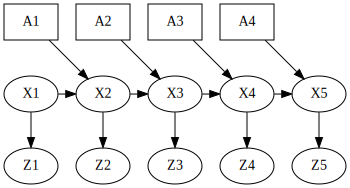

In [ ]:
# NOTE: You may need to rerun this cell once in a while to reset your DBN.
# Also, feel free to test different priors when doing ancestral sampling.
priors = get_prior()
#action_spec.. 방별 엑션별 갈 수 있는 위치이런거아ㅣㄴㄹ까.. 
action_spec = """ 
    1/0/0/0/0 0/1/0/0/0 1/0/0/0/0 0/0/0/1/0
    1/0/0/0/0 0/1/0/0/0 0/1/0/0/0 0/0/0/0/1
    0/0/1/0/0 0/0/0/1/0 0/0/1/0/0 0/0/1/0/0
    0/0/1/0/0 0/0/0/0/1 1/0/0/0/0 0/0/0/1/0
    0/0/0/1/0 0/0/0/0/1 0/1/0/0/0 0/0/0/0/1
    """
sensor_spec = "1/1/8 1/1/8 2/7/1 8/1/1 1/8/1" #방별 감지되는 빛의 확률, dark, medium, light
N = 5
X = create_state_series("X", range(1,N+1))
A = create_action_series("A", range(1,N))
Z = create_sensor_series("Z", range(1,N+1))
dbn = create_dbn(priors, X, A, Z, sensor_spec, action_spec, 5)
show(dbn, hints={"A":2, "X":1, "Z":0}, boxes={A[k][0] for k in range(1,N)})

**What is ancestral sampling?**
Ancestral sampling is done by performing state transformations from a topological sorting of the DBN. This is the same as simulating the robot over time based on the DBN you just created. 
We sample the initial state from the prior distribution $x_t \sim P(X_t)$, sample the observation from its CPT $o_t \sim P(O_t | X_t=x_t)$, and finally sample the next state from the motion model $x_{t + 1} \sim P(X_{t+1}|X_t=x_t, A_t=a_t)$.

To perform ancestral sampling let's first create some action sequences so that we can simulate our DBN. Create an action sequence consisting only of left actions, and another that is only left actions except for the final action, which is up.

In [ ]:
#TODO 8
def create_all_left_action_sequence(A, num_actions):
  """
  Return an action sequence such that all actions within the sequence are "L" (left)

      Parameters:
          A: Actions dictionary
          num_actions (int): number of actions within the sequence

      Returns:
          action_seq (dict): a dictionary with the key being the action state variable (for instance, "A1", "A2", ...)
                             and the value being the left action "L"
  """
  action_seq  = None
  ###############################################################################
  #                             START OF YOUR CODE                              #
  ############################################################################### 
  # action_seq = VARIABLES.assignment({A[k]: "L" for k in range(1,num_actions+1)}) #+1한이유는 A가 무슨이유에선지 index1로시작해서 최종결과물의 사이즈가 num_acion의 수와 맞추기위함임.
  
  #A는 hashmap의 key 같은 존재들인듯. 그냥 key로 찾아서 그때 action뭔가 알 수 있는 용도..
  action_seq = {}
  for k in range(1, num_actions+1):
    # print(A[k][0])
    action_seq.update({
        # A[k][0]:"L"
        A[k]:"L"
    })
  print("all left:",action_seq)
  ###############################################################################
  #                              END OF YOUR CODE                               #
  ###############################################################################
  return action_seq

#TODO 9
def create_custom_action_sequence(A, num_actions):
  """
  Return an action sequence such that all actions within the sequence are "L" (left) except the last action being "U" (up)
  For example, if num_action is 1, then action sequence is {"A1": "U"}
               if num_action is 2, then action sequence is {"A1": "L", "A2": "U"}
               if num_action is 3, then action sequence is {"A1": "L", "A2": "L", "A3": "U"}

      Parameters:
          A: Actions dictionary
          num_actions (int): number of actions within the sequence

      Returns:
          action_seq (dict): a dictionary with the key being the action state variable (for instance, "A1", "A2", ...)
                             and the value being the specific action from "L", "R", "U", "D"
  """
  action_seq  = None
  ###############################################################################
  #                             START OF YOUR CODE                              #
  ############################################################################### 
  # action_seq = VARIABLES.assignment({A[k]: "U" if k==num_actions else "L" for k in range(1,num_actions+1)})
  action_seq = {}
  for k in range(1, num_actions+1):
    if k == num_actions:
      action_seq.update({
        # A[k][0]:"U"
        A[k]:"U"
      })
    else:
      action_seq.update({
        A[k]:"L"
        # A[k][0]:"U"
      })
  # print(A, num_actions,action_seq)
  print("all left except the last:",action_seq)
  ###############################################################################
  #                              END OF YOUR CODE                               #
  ###############################################################################
  return action_seq


Let's see if your action sequences are being generated correctly! Run the following cell to test your action sequences.

In [ ]:
create_all_left_action_sequence(A,3)
create_custom_action_sequence(A,3)

all left: {(4683743612465315841, 4): 'L', (4683743612465315842, 4): 'L', (4683743612465315843, 4): 'L'}
all left except the last: {(4683743612465315841, 4): 'L', (4683743612465315842, 4): 'L', (4683743612465315843, 4): 'U'}


{(4683743612465315841, 4): 'L',
 (4683743612465315842, 4): 'L',
 (4683743612465315843, 4): 'U'}

Now, implement ancestral sampling on the DBN. Applies an action sequence to the DBN, and uses the motion model to sample a potential state sequence.

In [ ]:
#TODO 10
def ancestral_sampling(dbn, action_sequence):
  """
  Returns an ancestral sampling of a dynamic bayes net

      Parameters:
          dbn (gtsam.DiscreteBayesNet): the dynamic bayes net that represents the evolution of the (room) state over time
          action_sequence (dict): a dictionary with the key being the action state variable (for instance, "A1", "A2", ...)
                                  and the value being the specific action from "L", "R", "U", "D"

      Returns:
          samples (gtsam.DiscreteValues): a DiscreteValues variable that contains key-value pairs with the key being all variables
                                          within the dynamic bayes net (for instance X1, X2, A1, A2, Z1, Z2) and the value being
                                          its corresponding sampled value
  """
  samples = None 
  ###############################################################################
  #                             START OF YOUR CODE                              #
  ############################################################################### 
  # print("action:" , len(action_sequence), "keys", action_sequence.keys() , "value", action_sequence.values())
  actions = VARIABLES.assignment({list(action_sequence.keys())[k] : list(action_sequence.values())[k] for k in range(0, len(action_sequence))})
  # print("actions..",actions)
  samples = dbn.sample(actions)
  # print(samples)
  ###############################################################################
  #                              END OF YOUR CODE                               #
  ###############################################################################
  return samples
# test_action_sequence = create_custom_action_sequence(A,N-1)
# print("A,", A, ", N-1", (N-1))
# #나오는결과 숫자: time = t를 의미, A: T때의 액션, X:T때의 위치, Z:T때의 밝기센서
# sample = ancestral_sampling(dbn, test_action_sequence)

Let's see if your ancestral sampling algorithm is running as expected. In the next block, change `test_action_sequence` using the two functions above and run ancestral sampling on them.

In [ ]:
#test_action_sequence = create_all_left_action_sequence(A,N-1)
test_action_sequence = create_custom_action_sequence(A,N-1)
#나오는결과 숫자: time = t를 의미, A: T때의 액션, X:T때의 위치, Z:T때의 밝기센서
sample = ancestral_sampling(dbn, test_action_sequence)
pretty(sample)

all left except the last: {(4683743612465315841, 4): 'L', (4683743612465315842, 4): 'L', (4683743612465315843, 4): 'L', (4683743612465315844, 4): 'U'}


Congrats! You have performed ancestral sampling with RoomBuzz! Now that we can simulate our DBN, we can draw certain conclusions. Note that we can find the value of Variable from the sample using the following code:

In [ ]:
var_name = "X"
timestep = 5
print(ROOMS[sample[gtsam.Symbol(var_name, timestep).key()]])

Living Room


Now, write some code that runs ancestral sampling N times and returns the Kth state as a list.

In [ ]:
#TODO 11
def simulate_multiple(dbn, action_sequence, N, K):
  """
  Runs ancestral sampling multiple times and returns the Kth state of each iteration.

      Parameters:
          dbn (gtsam.DiscreteBayesNet): the dynamic bayes net that represents the evolution of the (room) state over time
          action_sequence (dict): a dictionary with the key being the action state variable (for instance, "A1", "A2", ...)
                                  and the value being the specific action from "L", "R", "U", "D"
          N (int): number of times to simulate the dbn
          K (int): which value to return

      Returns:
          resulting_states (list): a list of strings containing the final state of ancestral sampling.
  """
  resulting_states = [] 
  ###############################################################################
  #                             START OF YOUR CODE                              #
  ############################################################################### 
  # help(dbn.sample(action_sequence).keys())
  # keys = dbn.sample(action_sequence).keys()
  # print(keys) 쓸모없어.. 
  # help(action_sequence.keys())
  # key = list(action_sequence.keys())[K]
  # print(key)

  #ㅋㅋ
  # print("ac",len(action_sequence))
  # actions = VARIABLES.assignment({list(action_sequence.keys())[k] : list(action_sequence.values())[k] for k in range(0, len(action_sequence))})
  for k in range(N):
    # print("k", k , "ancestral_sampling:",list(ancestral_sampling(dbn, action_sequence)) )
    sampling = list(ancestral_sampling(dbn, action_sequence).values())
    state = ROOMS[sampling[len(action_sequence)+K-1]]
    # print("sampling:",sampling) 결과를 알고싶다면 이것의 봉인을 풀어라..
    #action seq만큼 더해주는이유는 ancestral sampling이 a1, x1, z1순으로 데이터를 가진거같아서임. state는 x1을 원하므로 더해줬음 
    # k-1해주는이유는 얘네들이 첫번째 state를원할때 1을쓰는데 컴퓨터는 0부터 시작하기때문.
    
    #sampling을 N번하고 그 결과에서 t=K일때 state값을 resulting_state에 추가합니다.
    # resulting_states.append(ROOMS[state])

    resulting_states.append(state)

  print(resulting_states)

  ###############################################################################
  #                              END OF YOUR CODE                               #
  ###############################################################################
  return resulting_states
simulate_multiple(dbn, create_custom_action_sequence(A, N-1), 5, 1)

all left except the last: {(4683743612465315841, 4): 'L', (4683743612465315842, 4): 'L', (4683743612465315843, 4): 'L', (4683743612465315844, 4): 'U'}
['Dining Room', 'Office', 'Dining Room', 'Dining Room', 'Dining Room']


['Dining Room', 'Office', 'Dining Room', 'Dining Room', 'Dining Room']

Check if the simulation is working:


In [ ]:
result = simulate_multiple(dbn, create_custom_action_sequence(A, N-1), 5, 1)
print(result)

all left except the last: {(4683743612465315841, 4): 'L', (4683743612465315842, 4): 'L', (4683743612465315843, 4): 'L', (4683743612465315844, 4): 'U'}
ac 4
['Dining Room', 'Dining Room', 'Kitchen', 'Kitchen', 'Hallway']


Let's plot our results in a bar graph. Use plotly to create a histogram describing the the state RoomBuzz is in at a certain timestep.

In [ ]:
#TODO 12
def plot_state_histogram(state_list):
  """
  Plot the graph showing the number of times each state is visited in the list provided.
  Check out https://plotly.com/python/plotly-express/ for more info about using plotly.

  Make sure to include axis titles!

      Parameters:
          state_list (list): the list of visited states
      
      Returns:
          figure (histogram): the histogram of visited states

  """
  figure = None
  ###############################################################################
  #                             START OF YOUR CODE                              #
  ###############################################################################
  
  # visited_time =  [0 for i in range(5)] 
  # print(state_list)
  # for k in range(len(state_list)):
  #   state = state_list[k]
  #   index = state
  #   # index = ROOMS[state]
  #   # print("index",state)
  #   # index = X.get(state_list[k])
  #   # print("key", state_list[k],"\nX", X,"index",index)
  #   visited_time[index] = visited_time[index]+1
  #   # print(state_list[k],",:",)
  # room_num = list(range(0,5))
  # df = {'rooms': room_num, '# of visited': visited_time}
  # # df = px.DataFrame(data= d)
  # figure = px.bar(df, x='rooms', y='# of visited')
  # figure.show()
  
  visited_time =  [0 for i in range(5)] 
  for k in range(len(state_list)):
    index = ROOMS.index(state_list[k])
    visited_time[index] = visited_time[index]+1
    # print(state_list[k],",:",)
  room_num = list(range(0,5))
  df = {'rooms': room_num, '# of visited': visited_time}
  # df = px.DataFrame(data= d)
  figure = px.bar(df, x='rooms', y='# of visited')
  # figure.show()
  ###############################################################################
  #                              END OF YOUR CODE                               #
  ############################################################################### 
  return figure
# plot_state_histogram(simulate_multiple(dbn, create_custom_action_sequence(A, N-1), 1000, 1))

Let's plot the histogram containing the states reached at timestep 1.

*   List item
*   List item



In [ ]:
#이것은 리포트 작성용이고 위의 TIME STEP1이 가르키는것은 이 밑의 것임
#CUSTOM ACTION이라해봤자, 무지성 좌클릭하다가 마지막에 서비스로 up해주는거임.
test_action_sequence = create_custom_action_sequence(A,N-1)
# 1000 = 테스트횟수 N= 마지막 state
plot_state_histogram(simulate_multiple(dbn, test_action_sequence,1000,N))

all left except the last: {(4683743612465315841, 4): 'L', (4683743612465315842, 4): 'L', (4683743612465315843, 4): 'L', (4683743612465315844, 4): 'U'}
['Office', 'Office', 'Living Room', 'Office', 'Living Room', 'Office', 'Office', 'Office', 'Office', 'Living Room', 'Office', 'Living Room', 'Living Room', 'Living Room', 'Office', 'Living Room', 'Office', 'Office', 'Office', 'Living Room', 'Living Room', 'Office', 'Office', 'Living Room', 'Office', 'Office', 'Living Room', 'Office', 'Office', 'Living Room', 'Living Room', 'Office', 'Office', 'Living Room', 'Office', 'Living Room', 'Office', 'Living Room', 'Office', 'Living Room', 'Office', 'Office', 'Living Room', 'Living Room', 'Office', 'Office', 'Office', 'Office', 'Office', 'Office', 'Living Room', 'Office', 'Office', 'Office', 'Living Room', 'Office', 'Office', 'Office', 'Office', 'Office', 'Living Room', 'Living Room', 'Office', 'Office', 'Office', 'Office', 'Office', 'Office', 'Office', 'Office', 'Office', 'Office', 'Living Room'

In [ ]:
#이것은 리포트 작성용이고 위의 TIME STEP1이 가르키는것은 이 밑의 것임
test_action_sequence = create_all_left_action_sequence(A,N-1)
# 1000 = 테스트횟수 1= 제일 처음 state
plot_state_histogram(simulate_multiple(dbn, test_action_sequence,1000,1))

all left: {(4683743612465315841, 4): 'L', (4683743612465315842, 4): 'L', (4683743612465315843, 4): 'L', (4683743612465315844, 4): 'L'}
sampling: [0, 0, 0, 0, 4, 3, 2, 2, 2, 1, 2, 1, 1, 1]
sampling: [0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2]
sampling: [0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 2]
sampling: [0, 0, 0, 0, 4, 3, 2, 2, 2, 1, 0, 1, 0, 1]
sampling: [0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 1, 1, 1]
sampling: [0, 0, 0, 0, 3, 2, 2, 2, 2, 0, 1, 1, 1, 2]
sampling: [0, 0, 0, 0, 3, 2, 2, 2, 2, 0, 1, 1, 1, 1]
sampling: [0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 2, 2, 1, 2]
sampling: [0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 2]
sampling: [0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2]
sampling: [0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 1, 2, 2]
sampling: [0, 0, 0, 0, 3, 2, 2, 2, 2, 0, 1, 0, 1, 1]
sampling: [0, 0, 0, 0, 4, 3, 2, 2, 2, 1, 0, 1, 1, 1]
sampling: [0, 0, 0, 0, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2]
sampling: [0, 0, 0, 0, 2, 2, 2, 2, 2, 1, 0, 2, 0, 1]
sampling: [0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 1]
sampling: [0, 0, 

In [ ]:
plot_state_histogram(simulate_multiple(dbn, create_custom_action_sequence(A, N-1), 1000, 1))

# plot_state_histogram(simulation_multiple(dbn, create_))


all left except the last: {(4683743612465315841, 4): 'L', (4683743612465315842, 4): 'L', (4683743612465315843, 4): 'L', (4683743612465315844, 4): 'U'}
ac 4


###REPORT QUESTIONS
3.1) Notice that sometimes, multiple different light observations are made in the same state. Explain why. Can we use these light readings to infer what state we are in?

3.2) Run ancestral sampling 1000 times to find the **initial** state using the prior from `get_prior()` and the action sequence from `create_all_left_action_sequence()`. Plot a histogram with the results. Why do we see the resulting distribution? Paste your histogram in your report.

3.3) Run ancestral sampling 1000 times to find the **final** state using the prior from `get_prior()` and the action sequence from `create_custom_action_sequence()`. Plot a histogram with the results. What do you notice? Explain why we see the resulting distribution. Paste your histogram in your report.

##**Section 3.4: Perception**
This section tackles the inference problem in Hidden Markov Models; the values of certain variables are unknown, and we want to determine the most likely assignment of these variables. 

RoboBuzz also needs to be able to infer its most likely path over time given its actions taken and observations. There are multiple ways to do this, one of them being Maximum Probable Explanation (MPE). MPE iterates over all possible combinations of variable assignments and accepts the assignment with the highest likelihood. This operation is slow (exponential in the size of the input).

Recall that we represent HMM's as factor graphs; the state assignments over time are proportional to the product of the factors in the factor graph. Let's generate our factor graph and perform MPE.

In [ ]:
def create_factor_graph(N):
  priors = get_prior()
  X = create_state_series("X", range(1,N+1))
  A = create_action_series("A", range(1,N))
  Z = create_sensor_series("Z", range(1,N+1))
  # print("a:",A, "N:", N)
  action_assignment = VARIABLES.assignment(create_custom_action_sequence(A, N-1))

  graph = gtsam.DiscreteFactorGraph()
  graph.add(X[1], "1 1 1 1 1") # \phi(X_1) = P(X_1)
  for k in range(1,N):
      #(x2| x1,x2)
      conditional = gtsam.DiscreteConditional(X[k+1], [X[k], A[k]], action_spec)
      conditional_a_k = conditional.choose(action_assignment) # \phi(X,X+) = P(X+|X,A=a)
      graph.push_back(conditional_a_k)
  for k, measurement in enumerate(LIGHT_LEVELS):
      #(Z|X)
      conditional = gtsam.DiscreteConditional(Z[k+1], [X[k+1]], sensor_spec)
      z_k = LIGHT_LEVELS.index(measurement)
      factor = conditional.likelihood(z_k) # \phi(X) = P(Z=z|X)
      graph.push_back(factor)
  return graph,X
create_factor_graph(3)

state series:  {1: (6341068275337658369, 5), 2: (6341068275337658370, 5), 3: (6341068275337658371, 5)}
action series: {1: (4683743612465315841, 4), 2: (4683743612465315842, 4)}
all left except the last: {(4683743612465315841, 4): 'L', (4683743612465315842, 4): 'U'}


ValueError: ignored

Let's visualize the factor graph!

state series:  {1: (6341068275337658369, 5), 2: (6341068275337658370, 5), 3: (6341068275337658371, 5)}
action series: {1: (4683743612465315841, 4), 2: (4683743612465315842, 4)}
all left except the last: {(4683743612465315841, 4): 'L', (4683743612465315842, 4): 'U'}


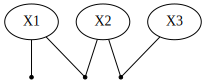

In [ ]:
graph,_ = create_factor_graph(3) # 4이상부터는 xi끼리 연결된 factor graph가 보인다..
show(graph)

In order to perform MPE, we need to generate all possible trajectories for the factor graph.

In [ ]:
def generateAllTrajactories(n, X, arr, i,trajectories_list):
    if i == n:
        trajectories_list.append(VARIABLES.assignment({X[k+1]:arr[k] for k in range(n)}))
        return 

    for elem in range(5):
      arr[i] = ROOMS[elem]
      generateAllTrajactories(n, X, arr, i + 1,trajectories_list)


Finally, we can perform MPE using the `generateAllTrajectories` method above.

In [ ]:
# TODO 13
def naive_MPE(graph, N, X):
  """
  Implement the function to return the value for maximum probable explanation and its corresponding state trajectory

    Parameters:
        graph (gtsam.DiscreteFactorGraph): the factor graph used to find mpe
        N: number of states
        X: states dictionary

    Returns:
        mpe_value (float): the value for maximum probable explanation
        mpe_trajectory (gtsam.DiscreteValues): the DiscreteValues variable that contains the key-value pair with the key being the
                                                (room) state variable and the value being its corresponding value
  """
  mpe_value = 0
  mpe_trajectory = None
  ###############################################################################
  #                             START OF YOUR CODE                              #
  ############################################################################### 
  # print("n:",N,"\nx:",X)
  # help(X) #dict type
  # print("X:", X, "x6:",  X[0])
  # print("graph:",graph(VARIABLES.assignment({X[1]: ROOMS[0], X[2]: ROOMS[1], X[3]:ROOMS[2]})))
  
  # for x1 in ROOMS:
  #   for x2 in ROOMS:
  #       for x3 in ROOMS:
  #         for x4 in ROOMS:
  #           for x5 in ROOMS:
  #             for x6 in ROOMS:
  #               trajectory = VARIABLES.assignment({X[1]: x1, X[2]: x2, X[3]: x3, X[4]: x4, X[5]: x5, X[6]: x6})
  #               #map at erorr가 떳던이유가 크기가6인데 교과서대로 3개만해섴ㅋㅋ
  #               value = graph(trajectory)
  #               arr = [0 for i in range(N)]
  #               # print(value)
  #               # generateAllTrajactories(N, X, arr, 0, list(trajectory))
  #               # print("gra:",graph,"arr",arr,"\ntrac",trajectory)
  #               if value > mpe_value:
  #                   mpe_value = value
  #                   mpe_trajectory = trajectory
  arr = [0 for i in range(N)]
  trajectory_list = []
  generateAllTrajactories(N,X,arr,0,trajectory_list) #이거자체로 위의 for loop들을 흉내낼수있다.. 멋지네
  # print("arr:",arr)
  # print("trad:",trajectory_list)
  for i in range(len(trajectory_list)):
    value = graph(trajectory_list[i])
    if value > mpe_value:
      mpe_value = value
      mpe_trajectory = trajectory_list[i]
  print(f"found MPE solution with value {mpe_value:.4f}:")
  ###############################################################################
  #                              END OF YOUR CODE                               #
  ###############################################################################    
  return mpe_value, mpe_trajectory
N = 0+3
cur_graph,cur_X = create_factor_graph(N)
mpe_value,mpe_trajectory = naive_MPE(cur_graph,N,cur_X)
print("mpe", mpe_value, "mpetra", mpe_trajectory)

state series:  {1: (6341068275337658369, 5), 2: (6341068275337658370, 5), 3: (6341068275337658371, 5)}
action series: {1: (4683743612465315841, 4), 2: (4683743612465315842, 4)}
all left except the last: {(4683743612465315841, 4): 'L', (4683743612465315842, 4): 'U'}
found MPE solution with value 0.0560:
mpe 0.055999999999999994 mpetra DiscreteValues{6341068275337658369: 3, 6341068275337658370: 2, 6341068275337658371: 2}


Check that we are outputting the optimal trajectory:

In [ ]:
N = 6
cur_graph,cur_X = create_factor_graph(N)
mpe_value,mpe_trajectory = naive_MPE(cur_graph,N,cur_X)
print(mpe_trajectory)

state series:  {1: (6341068275337658369, 5), 2: (6341068275337658370, 5), 3: (6341068275337658371, 5), 4: (6341068275337658372, 5), 5: (6341068275337658373, 5), 6: (6341068275337658374, 5)}
action series: {1: (4683743612465315841, 4), 2: (4683743612465315842, 4), 3: (4683743612465315843, 4), 4: (4683743612465315844, 4), 5: (4683743612465315845, 4)}
all left except the last: {(4683743612465315841, 4): 'L', (4683743612465315842, 4): 'L', (4683743612465315843, 4): 'L', (4683743612465315844, 4): 'L', (4683743612465315845, 4): 'U'}
found MPE solution with value 0.0560:
DiscreteValues{6341068275337658369: 3, 6341068275337658370: 2, 6341068275337658371: 2, 6341068275337658372: 2, 6341068275337658373: 2, 6341068275337658374: 2}


This is a naive MPE solution; GTSAM provides a more efficient solution. Check out DiscreteFactorGraph documentation for more information!

In [ ]:
#TODO 14
def GTSAM_MPE(graph):
  """
  Implement the function to return the mpe trajectory using gtsam

      Parameters:
          graph (gtsam.DiscreteFactorGraph): the factor graph used to find mpe

      Returns:
          mpe_trajectory (gtsam.DiscreteValues): the DiscreteValues variable that contains the key-value pair with the key being the
                                                 (room) state variable and the value being its corresponding value
  """
  mpe = None
  ###############################################################################
  #                             START OF YOUR CODE                              #
  ############################################################################### 
  dag = graph.maxProduct()
  mpe = dag.argmax()
  ###############################################################################
  #                              END OF YOUR CODE                               #
  ###############################################################################
  return mpe

The GTSAM MPE trajectory should match that of our Naive MPE.

In [ ]:
cur_graph,_ = create_factor_graph(N)
print("n:",N)
mpe_trajectory = GTSAM_MPE(cur_graph)
print(mpe_trajectory)

state series:  {1: (6341068275337658369, 5), 2: (6341068275337658370, 5), 3: (6341068275337658371, 5), 4: (6341068275337658372, 5), 5: (6341068275337658373, 5), 6: (6341068275337658374, 5)}
action series: {1: (4683743612465315841, 4), 2: (4683743612465315842, 4), 3: (4683743612465315843, 4), 4: (4683743612465315844, 4), 5: (4683743612465315845, 4)}
all left except the last: {(4683743612465315841, 4): 'L', (4683743612465315842, 4): 'L', (4683743612465315843, 4): 'L', (4683743612465315844, 4): 'L', (4683743612465315845, 4): 'U'}
n: 6
DiscreteValues{6341068275337658369: 3, 6341068275337658370: 2, 6341068275337658371: 2, 6341068275337658372: 2, 6341068275337658373: 2, 6341068275337658374: 2}


Is Naive MPE or GTSAM MPE better? 🤔 Now let us run both the algorithms and capture the time taken for the given number of states. Compare the naive vs GTSAM implementation running times for 3 to 9 states. Look at the graph before for an understanding on what is expected. Please include the legend and Axis labels for full credit.


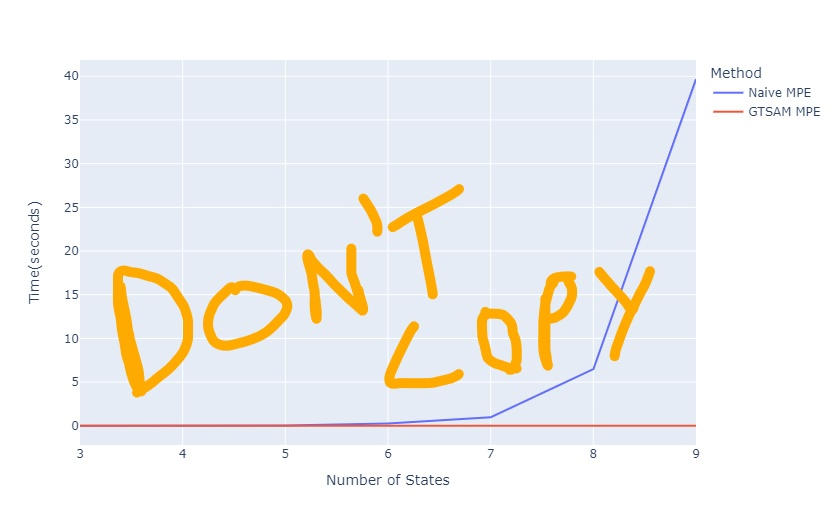

In [ ]:
#TODO 15
def plot_time_complexity():
  """
  Plot the graph to compare the execution time between the naive mpe approach and the gtsam approach
  Check out https://plotly.com/python/plotly-express/ for more info about using plotly.

  X-axis should the N (number states) and Y-axis should be execution time
  """
  figure = None
  ###############################################################################
  #                             START OF YOUR CODE                              #
  ############################################################################### 
  state_number = list(range(3,10))
  gtsam_exe_time = []
  naive_exe_time = []
  for i in range(len(state_number)):
    #GRAPH 생성
    # print("i",(i+3))
    #GTSAM측정시작
    start_time = time.time()
    cur_graph,cur_X = create_factor_graph(i+3)
    mpe_trajectory = GTSAM_MPE(cur_graph)
    end_time = time.time()
    exe_time = end_time - start_time
    gtsam_exe_time.append(exe_time)
    #GTSAM 측정종료
    #NAIVE측정시작
    start_time = time.time()
    cur_graph,cur_X = create_factor_graph(i+3)
    mpe_value,mpe_trajectory = naive_MPE(cur_graph,i+3,cur_X)
    end_time = time.time()
    exe_time = end_time - start_time
    naive_exe_time.append(exe_time)
    #NAIVE측정종료
  df = {'Number of states':state_number ,'gtsam':gtsam_exe_time ,'naive':naive_exe_time}
  figure = px.line()
  # figure = px.line(df, x="Number of states", y=))
  # figure.add_scatter(x=df['Number of states'], y=df['gtsam'])
  figure.add_scatter(x=df['Number of states'], y=df['gtsam'], name ='GTSAM MPE')
  figure.add_scatter(x=df['Number of states'], y=df['naive'], name ='Naive MPE')
  figure.update_layout(
    xaxis_title="Number of States", yaxis_title="Time(seconds)", legend_title ="Method"
  )
  # figure.show()
  # print("gt",gtsam_exe_time)
  # print("na",naive_exe_time)

  ###############################################################################
  #                              END OF YOUR CODE                               #
  ###############################################################################
  return figure
# fig = plot_time_complexity()

Plot the running time of Naive MPE vs GTSAM MPE:

In [ ]:
fig = plot_time_complexity()
fig.show()

state series:  {1: (6341068275337658369, 5), 2: (6341068275337658370, 5), 3: (6341068275337658371, 5)}
action series: {1: (4683743612465315841, 4), 2: (4683743612465315842, 4)}
all left except the last: {(4683743612465315841, 4): 'L', (4683743612465315842, 4): 'U'}
state series:  {1: (6341068275337658369, 5), 2: (6341068275337658370, 5), 3: (6341068275337658371, 5)}
action series: {1: (4683743612465315841, 4), 2: (4683743612465315842, 4)}
all left except the last: {(4683743612465315841, 4): 'L', (4683743612465315842, 4): 'U'}
found MPE solution with value 0.0560:
state series:  {1: (6341068275337658369, 5), 2: (6341068275337658370, 5), 3: (6341068275337658371, 5), 4: (6341068275337658372, 5)}
action series: {1: (4683743612465315841, 4), 2: (4683743612465315842, 4), 3: (4683743612465315843, 4)}
all left except the last: {(4683743612465315841, 4): 'L', (4683743612465315842, 4): 'L', (4683743612465315843, 4): 'U'}
state series:  {1: (6341068275337658369, 5), 2: (6341068275337658370, 5), 3

###REPORT QUESTIONS
4.1) What do the following factor graphs look like:
* If all actions and measurements are unknown?
* If actions are known but measurements are unknown?
* If actions and measurements are unkown but the state series is known?

4.2) Plot the graph comparing the running time of naive MPE to GTSAM MPE. 

4.3)  What is the time complexity of MPE when enumerating over N different number of states? Choose one of the following.

* Linear ($ax+c$)      
* Cubic ($ax^3+c$)     
* Quintic ($ax^5+c$)   
* Exponential ($e^x+c$) 

##**Section 3.5: Markov Decision Processes**
As noted in the textbook, planning is the process of choosing control inputs; this leads us to the key concept of Markov Decision Processes. The decision of what actions RoomBuzz chooses to take are taken from a _policy_, which is determined through RoomBuzz finding which future state may provide it the highest _reward_.

Suppose the kitchen is very dirty. A potential reward function for RoomBuzz in this case would be 10 for entering the Kitchen, and 0 for all other states.

In learning, we also have a concept of a _policy rollout_; this is similar to simulating our DBN in section 3.3, except we apply transition probabilities and chosen actions to find a potential state sequence for the robot.

Using this rollout, a cumulative, discounted, _rollout reward_ for being in a certain state can be found.

Run the following block to define the length of the state series and the CPT.

In [ ]:
N = 5
#action spec.. xt+1 = xt ,at... xt에서 at햇을때 xt+1인거임.. 특정위치에 있을확률...
action_spec = """
      1/0/0/0/0 2/8/0/0/0 1/0/0/0/0 2/0/0/8/0
      8/2/0/0/0 0/1/0/0/0 0/1/0/0/0 2/0/0/0/8
      0/0/1/0/0 0/0/2/8/0 0/0/1/0/0 0/0/1/0/0
      0/0/8/2/0 0/0/0/2/8 8/0/0/2/0 0/0/0/1/0
      0/0/0/8/2 0/0/0/0/1 0/8/0/0/2 0/0/0/0/1
      """

Here are some functions that are critical to value/policy iteration in our MDP:

In [ ]:
def reward_function(state:str, action:str, next_state:str):
    """
    Reward that returns 10 upon entering the living room.
    """
    return 10.0 if next_state == "Living Room" else 0.0

def perform_rollout(markovChain, x1, actions):
    """Roll out states given actions as a dictionary"""
    dict = actions.copy()
    dict[X[1]] = x1
    given = VARIABLES.assignment(dict)
    return markovChain.sample(given)
  
def reward(R, rollout, A, X, k):
    """Return state, action, next_state triple for given rollout at time k."""
    state = rollout[X[k][0]]
    action = rollout[A[k][0]]
    next_state = rollout[X[k+1][0]]
    return R[state, action, next_state]

def rollout_reward(R, rollout, A, X, horizon=N-1, gamma=1.0):
    """Calculate reward for a given rollout"""
    discounted_rewards = [gamma**(k-1) * reward(R, rollout, A, X, k) for k in range(1,horizon)]
    return sum(discounted_rewards)

def get_transition_prob(action_spec):
  conditional = gtsam.DiscreteConditional((2,5), [(0,5), (1,4)], action_spec)
  T = np.empty((5, 4, 5), float)
  for assignment, value in conditional.enumerate():
      x, a, y = assignment[0], assignment[1], assignment[2]
      T[x, a, y] = value
  return T

Let's also create a markov chain to describe our robot's sequence over time.

In [ ]:
#TODO 16
def create_markovChain(action_spec, N):
  """
  Implement the function such that it returns a Markov Chain 

      Parameters:
          N (int): number of states

      Returns:
          markovChain (gtsam.DiscreteBayesNet): a DiscreteBayeesNet that describes the Markov Chain 
  """
  X = VARIABLES.discrete_series("X", range(1, N+1), ROOMS)
  A = VARIABLES.discrete_series("A", range(1, N), ACTIONS)
  markovChain = gtsam.DiscreteBayesNet()
  ###############################################################################
  #                             START OF YOUR CODE                              #
  ############################################################################### 
  for k in reversed(range(1,N)):
    markovChain.add(X[k+1], [X[k], A[k]], action_spec)

  ###############################################################################
  #                              END OF YOUR CODE                               #
  ###############################################################################
  return markovChain

Display the markov chain:

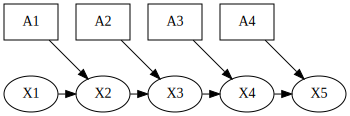

In [ ]:
markovChain = create_markovChain(action_spec, N)
show(markovChain, hints={"A":2, "X":1, "Z":0}, boxes={A[k][0] for k in range(1,N)})

Now use the above functions and markov chain to find the expected reward from a sequence of actions. First generate the reward table, and then find the reward for a given control tape.

In [ ]:
#TODO 17
def generate_reward_table(action_spec):
  """
    Generates a reward table using the reward_function.
    Parameters:
            action_spec (str): A table that contains all possible values of P(X2|X1, A1)

    HINT: What does the variable assignment store? How does the dimensionality of the reward table compare to the motion model?
    assignment의 값은 x1, a1, x2이 들어있다.. 어떤 순서로 들어있찌..? 그냥 P(X2|X1,A1)의 값이 있는거같은데.. ASSIGNMENT는 그걸어찌알고 X2,X1,이런걸로 변환한단말이오?
    ACITON: L R U D  
  """
  conditional = gtsam.DiscreteConditional((2,5), [(0,5), (1,4)], action_spec)
  R = np.empty((5, 4, 5), float)
  for assignment, value in conditional.enumerate():
    ###############################################################################
    #                             START OF YOUR CODE                              #
    ############################################################################### 
    # continue #delete this line when you start with your code
    # print("as:", assignment, " value:",value)
    x, a, xt = assignment[0],assignment[1], assignment[2]

    R[x,a,xt]= reward_function(x,a, ROOMS[xt])
    # R[x,a,xt]= value
    # state = rollout[X[k][0]]
    # action = rollout[A[k][0]]
    # next_state = rollout[X[k+1][0]]
    ###############################################################################
    #                              END OF YOUR CODE                               #
    ###############################################################################
  return R
W = generate_reward_table(action_spec)
# print("R is : ",W ," zz") 죄다 index 0에만 10이넹..

#TODO 18
def control_tape_reward(markovChain, x1, actions, R, A, X):
  """
    Implement the function to calculate the reward given a sequence of actions
    Parameters:
        x1 (str): the initial (room) state 
        actions (dict): the dictionary that represents a sequence of actions taken by the agent
        R: array of expected reward given the current state, 
  """
  ###############################################################################
  #                             START OF YOUR CODE                              #
  ############################################################################### 
  print("initial state", x1)
  rollout = perform_rollout(markovChain,x1, actions)
  reward = rollout_reward(R, rollout,A,X )
  #이미 ROLLOUT_REWARD내에서 gamma= 1 이런게 정의되어있으면 파라매터로 패스할필요없다.


  ###############################################################################
  #                              END OF YOUR CODE                               #
  ###############################################################################
  
  return reward
actions_1 = {A[1]:"R", A[2]:"U", A[3]:"R", A[4]:"U"}
actions_2 = {A[1]:"R", A[2]:"U", A[3]:"U", A[4]:"U"}

print([control_tape_reward(markovChain, "Office", actions_1,R,A,X) for i in range(10)])

initial state Office
initial state Office
initial state Office
initial state Office
initial state Office
initial state Office
initial state Office
initial state Office
initial state Office
initial state Office
[10.0, 10.0, 10.0, 0.0, 0.0, 20.0, 20.0, 10.0, 10.0, 10.0]


Let's see what our rewards are for certain action sequences.

In [ ]:
R = generate_reward_table(action_spec)
actions_1 = {A[1]:"R", A[2]:"U", A[3]:"R", A[4]:"U"}
actions_2 = {A[1]:"R", A[2]:"U", A[3]:"U", A[4]:"U"}

print([control_tape_reward(markovChain, "Office", actions_1,R,A,X) for i in range(10)])
print([control_tape_reward(markovChain, "Office", actions_2,R,A,X) for i in range(10)])

[20.0, 10.0, 0.0, 0.0, 10.0, 10.0, 0.0, 10.0, 0.0, 0.0]
[0.0, 20.0, 20.0, 0.0, 20.0, 20.0, 0.0, 0.0, 20.0, 20.0]


We looked into to control tapes, but the fixed control tapes can never guarantee optimality because it can't be updated on the go. Now let us look into policies, which can be modified!

In [ ]:
#TODO 19
def get_custom_policy(N):
  #N is the number of actions needed in the policy
  policy = None
  ###############################################################################
  #                             START OF YOUR CODE                              #
  ############################################################################### 
  # policy = [2,0,1,2,3]
  #정책의 목적은, Living room에 도달하면 빠져나올수없고 그 근접한 곳에서 living room으로 향하게한다. 다이닝룸은 가망없게만듬
  #근접한곳까지 접근할 수 있도록 office에서는 hall로 hall에선 living 으로 가게구현했다..
  policy = []
  for i in range(N):
    policy.append(i%4)
  print("created policy", policy)
  ###############################################################################
  #                              END OF YOUR CODE                               #
  ###############################################################################
  return policy

Here are some helper functions for value iteration.

In [ ]:
def get_test_policy(N):
  RIGHT_INDEX = ACTIONS.index("R")
  LEFT_INDEX = ACTIONS.index("L")
  UP_INDEX = ACTIONS.index("U")
  DOWN_INDEX = ACTIONS.index("D")

  reasonable_policy = [RIGHT_INDEX, UP_INDEX, RIGHT_INDEX, UP_INDEX, RIGHT_INDEX]
  return reasonable_policy

def Q_value(R, T, value_function, x, a, gamma=0.9):
  """Calculate Q(x,a) from given value function"""
  return T[x,a] @ (R[x,a] + gamma * value_function)
    
def calculate_value_system(pi, R, T, gamma=0.9):
  """Calculate A, b matrix of linear system for value computation."""
  b = np.empty((5,), float)
  AA = np.empty((5,5), float)
  for x, room in enumerate(ROOMS):
      a = pi[x] # action under policy
      b[x] = T[x,a] @ R[x,a] # expected reward under policy pi
      AA[x] = -gamma * T[x,a]
      AA[x,x] += 1
  return AA,b
    
def calculate_value_function(pi, R,T, gamma=0.9):
  """Calculate value function for given policy"""
  AA, b = calculate_value_system(pi, R,T, gamma)
  return np.linalg.solve(AA,b)

You may replace the policy in `get_test_policy()` with your own using the parameter N.

In [ ]:
test_policy = get_custom_policy(5) #replace with your policy using get_custom_policy()
T = get_transition_prob(action_spec)
value_for_pi = calculate_value_function(test_policy, R,T,)
print("V(always_right):")
for i,room in enumerate(ROOMS):
    print(f"  {room:12}: {value_for_pi[i]}")

created policy [0, 1, 2, 3, 0]
V(always_right):
  Living Room : 100.00000000000003
  Kitchen     : 0.0
  Office      : 0.0
  Hallway     : -0.0
  Dining Room : 0.0


Now we must find the optimal policy for RoomBuzz! Refer to the textbook on how to perform policy iteration.

In [ ]:
def update_policy(R,T,value_function):
  """Update policy given a value function"""
  new_policy = [None for _ in range(5)]
  for x, room in enumerate(ROOMS):
      Q_values = [Q_value(R, T,value_function, x, a) for a in range(4)]
      new_policy[x] = np.argmax(Q_values)
  return new_policy

Finally, we can perform policy iteration using the reward function R, transition table T, and prior pi, for max_iterations iterations.

In [ ]:
#TODO 20
def policy_iteration(R,T,pi=None, max_iterations=100):
  """Do policy iteration, starting from policy `pi`."""
  for _ in range(max_iterations):
    ###############################################################################
    #                             START OF YOUR CODE                              #
    ############################################################################### 
    for _ in range(max_iterations):
        value_for_pi = calculate_value_function(pi,R,T) if pi is not None else np.zeros((5,))
        new_policy = update_policy(R, T, value_for_pi)
        if new_policy == pi:
            return pi, value_for_pi
        pi = new_policy
    ###############################################################################
    #                              END OF YOUR CODE                               #
    ###############################################################################
  raise RuntimeError("No stable policy found after {max_iterations} iterations")   
# policy = get_test_policy(5) #replace with your policy using get_custom_policy()
# optimal_policy, optimal_value_function = policy_iteration(R,T,policy)

Output the optimal policy!

In [ ]:
policy = get_test_policy(5) #replace with your policy using get_custom_policy()
optimal_policy, optimal_value_function = policy_iteration(R,T,policy)
print([ACTIONS[a] for a in optimal_policy])
print("The optimal values at each state when the optimal policy followed:")
for i,room in enumerate(ROOMS):
    print(f"  {room:12}: {optimal_value_function[i]}")

['L', 'L', 'R', 'U', 'U']
The optimal values at each state when the optimal policy followed:
  Living Room : 100.00000000000001
  Kitchen     : 97.56097560975611
  Office      : 85.66329565734684
  Hallway     : 97.5609756097561
  Dining Room : 85.66329565734685


###REPORT QUESTIONS
5.1) What is a rollout? What is rollout reward? 

5.2) Compare the two control tapes provided after TODO 18. What is the optimal control tape? Why?

5.3) What is the optimal policy? Give a short explanation on what this policy tells us.

5.4) What's the objective of using policy iteration? What's the objective of using value iteration?

##**EXTRA CREDIT - Section 3.6: Reinforcement Learning**


##Getting Data

First step for any learning method is getting data. We have implemented the function `explore_randomly` to generate data for you!

In [ ]:
def explore_randomly(x1, horizon=N):
    """Roll out states given a random policy, for given horizon."""
    data = []
    x = x1
    for _ in range(1, horizon):
        a = np.random.choice(4)
        next_state_distribution = gtsam.DiscreteDistribution(X[1], T[x, a])
        x_prime = next_state_distribution.sample()
        data.append((x, a, x_prime, R[x, a, x_prime]))
        x = x_prime
    return data

Write a function which give the data from the Hallway from horizon equal to 2000.

In [ ]:
#TODO 21
def generate_data():
  """Return the data from the Hallway with horizon 2000"""
  data = None
  ###############################################################################
    #                             START OF YOUR CODE                              #
  ############################################################################### 
  data = explore_randomly(ROOMS.index("Hallway"), horizon=2000)
  ###############################################################################
    #                              END OF YOUR CODE                               #
  ###############################################################################
  return data

Output the resulting data.

In [ ]:
data = generate_data()
print(data[:10]) # Prints the first 10 experiences from the generated data

[(3, 0, 2, 0.0), (2, 1, 3, 0.0), (3, 1, 3, 0.0), (3, 3, 3, 0.0), (3, 1, 4, 0.0), (4, 1, 4, 0.0), (4, 0, 4, 0.0), (4, 1, 4, 0.0), (4, 3, 4, 0.0), (4, 1, 4, 0.0)]


##Model-based Reinforcement Learning



We can estimate the transition probabilities  and reward table  from the data, and then we can use the algorithms from before to calculate the value function and/or optimal policy.

Given the reward summation and the T count, get the estimates of the Rewards and Transitions.

In [ ]:
#TODO 22
def get_estimates(R_sum, T_count):
  "Estimate R and T using R_sum and T_count"
  R_estimate = None
  T_estimate = None
  ###############################################################################
    #                             START OF YOUR CODE                              #
  ############################################################################### 
  # R_sum = np.zeros((5, 4, 5), float)
  # T_count = np.zeros((5, 4, 5), float)
  count = np.zeros((5, 4), int)
  for x, a, x_prime, r in data:
      R_sum[x, a, x_prime] += r
      T_count[x, a, x_prime] += 1
  R_estimate = np.divide(R_sum, T_count, where=T_count!=0)
  xa_count = np.sum(T_count, axis=2)
  T_estimate = T_count/np.expand_dims(xa_count, axis=-1)
  ###############################################################################
    #                              END OF YOUR CODE                               #
  ###############################################################################

  return R_estimate,T_estimate

We can test the estimate by actually simulating them.

In [ ]:
R_sum = np.zeros((5, 4, 5), float)
T_count = np.zeros((5, 4, 5), float)
count = np.zeros((5, 4), int)
for x, a, x_prime, r in data:
    R_sum[x, a, x_prime] += r
    T_count[x, a, x_prime] += 1

R_estimate,T_estimate = get_estimates(R_sum, T_count)


Running next two cells will help you check the performance of the estimations.

In [ ]:
# We can compare to see the esitmate and the ground truth of T and R
print(f"Ground truth T:\n{T[0]}")
print(f"Estimated T:\n{np.round(T_estimate[0], 2)}")

Ground truth T:
[[1.  0.  0.  0.  0. ]
 [0.2 0.8 0.  0.  0. ]
 [1.  0.  0.  0.  0. ]
 [0.2 0.  0.  0.8 0. ]]
Estimated T:
[[1.   0.   0.   0.   0.  ]
 [0.18 0.82 0.   0.   0.  ]
 [1.   0.   0.   0.   0.  ]
 [0.19 0.   0.   0.81 0.  ]]


In [ ]:
print(f"Ground truth R:\n{R[0]}")
print(f"Estimated R:\n{np.round(R_estimate[0], 2)}")


Ground truth R:
[[10.  0.  0.  0.  0.]
 [10.  0.  0.  0.  0.]
 [10.  0.  0.  0.  0.]
 [10.  0.  0.  0.  0.]]
Estimated R:
[[10.  0.  0.  0.  0.]
 [10.  0.  0.  0.  0.]
 [10.  0.  0.  0.  0.]
 [10.  0.  0.  0.  0.]]


###REPORT QUESTIONS

6.1) In the given equation, please define the variables x, a, x', γ, V\*, P, and R̅.

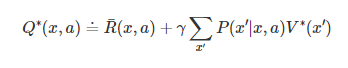

YOU ARE DONE!!!🎉🎉🥳🎉🎉